# Task 1 - Review unstructured JSON data and diagram a new structured relational data model

# Data Cleaning and Exploration

### In this module, we will perform data exploration and data quality analysis on Brands, Receipts and Users datasets.

In [456]:
# load required libraries
import pandas as pd
import numpy as np
import json
import datetime
from IPython.display import Image

In [457]:
# load data
brands = pd.read_json('brands.json.gz', lines = True)
receipts = pd.read_json('receipts.json.gz', lines = True)
users = pd.read_json('users.json.gz', lines = True)

### The point of this data exploration exercise is to find any data quality issues with the datasets and also understand the data we are dealing with and finally build a realtional data model with an ER diagram.

## Brands

In [458]:
brands

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...
1162,{'$oid': '5f77274dbe37ce6b592e90c0'},511111116752,Baking,BAKING,"{'$ref': 'Cogs', '$id': {'$oid': '5f77274dbe37...",test brand @1601644365844,NaN,NaN
1163,{'$oid': '5dc1fca91dda2c0ad7da64ae'},511111706328,Breakfast & Cereal,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '53e10d6368ab...",Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL
1164,{'$oid': '5f494c6e04db711dd8fe87e7'},511111416173,Candy & Sweets,CANDY_AND_SWEETS,"{'$ref': 'Cogs', '$id': {'$oid': '5332fa12e4b0...",test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217
1165,{'$oid': '5a021611e4b00efe02b02a57'},511111400608,Grocery,NaN,"{'$ref': 'Cogs', '$id': {'$oid': '5332f5f6e4b0...",LIPTON TEA Leaves,0.0,LIPTON TEA Leaves


In [459]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


In [460]:
brands.isnull().sum()

_id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
dtype: int64

### First things first, we notice "_id" column has a dictionary from which ids need to be extracted. Similarly, 'cpg' column also have dictionary values from which references and ids need be extracted. For this purpose, we will create a function.

In [461]:
# This function will extract value from the dictionary within each cell. 

def value_extraction(data, key):
    value_list = []
    for i in range(len(data)):
        try:
            value = data[i][key] #str
            value_list.append(value)
        except:
            value_list.append(np.nan) 
    return value_list

In [462]:
# Create a new id column and remove the old one.
brands['id'] = value_extraction(brands['_id'], '$oid')
brands.drop(columns= ['_id'], inplace = True)

In [463]:
# Perform the same operation for 'cpg' column. In this case, we will create 2 new columns.
brands['cpg_type'] = value_extraction(brands['cpg'], '$ref')
brands['cpg_id'] = value_extraction(brands['cpg'], '$id')

In [464]:
'''
There is still a string which needs to be first converted to a dictionary and 
then id cpg_id extracted from it. Here is a function for that.
This can be used later if needed. So I will wrap the logic in a function.
'''

def string_to_dict(data):
    value_list = []
    for i in range(len(data)):
        value = json.loads(str(data[i]).replace("'", '"'))
        value_list.append(value)
    return value_list

In [465]:
brands['cpg_id'] = string_to_dict(brands['cpg_id'])
brands['cpg_id'] = value_extraction(brands['cpg_id'], '$oid')

# Drop the column 'cpg'
brands.drop(columns= ['cpg'], inplace = True)

### Here is the updated Brands dataset

In [466]:
brands

,barcode,category,categoryCode,name,topBrand,brandCode,id,cpg_type,cpg_id
0,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,601ac115be37ce2ead437551,Cogs,601ac114be37ce2ead437550
1,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,601c5460be37ce2ead43755f,Cogs,5332f5fbe4b03c9a25efd0ba
2,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead43755d,Cogs,601ac142be37ce2ead437559
3,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead43755a,Cogs,601ac142be37ce2ead437559
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,601ac142be37ce2ead43755e,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...,...,...,...,...,...,...,...
1162,511111116752,Baking,BAKING,test brand @1601644365844,NaN,NaN,5f77274dbe37ce6b592e90c0,Cogs,5f77274dbe37ce6b592e90bf
1163,511111706328,Breakfast & Cereal,NaN,Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL,5dc1fca91dda2c0ad7da64ae,Cogs,53e10d6368abd3c7065097cc
1164,511111416173,Candy & Sweets,CANDY_AND_SWEETS,test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217,5f494c6e04db711dd8fe87e7,Cogs,5332fa12e4b03c9a25efd1e7
1165,511111400608,Grocery,NaN,LIPTON TEA Leaves,0.0,LIPTON TEA Leaves,5a021611e4b00efe02b02a57,Cogs,5332f5f6e4b03c9a25efd0b4


In [467]:
brands.isnull().sum()

barcode           0
category        155
categoryCode    650
name              0
topBrand        612
brandCode       234
id                0
cpg_type          0
cpg_id            0
dtype: int64

### Now with all the nested dictionaries removed, let's look into other columns. We notice that the columns 'catergory' and 'categoryCode' hold same values. Similarly, 'name' and 'brandCode' hold same values. Since these are codes that may need to used for tracking purpsoses, we might need to keep it. Good thing is we can use 'name' and 'catergory' for filling up 'brandCode' and 'categoryCode' respectively. And as for the 'category' column, we can fill it with a keyword 'Unknown' for now. We can swap with correct values later. The idea is to not have any misleading values.

### We are going to remove 'categoryCode' and 'brandCode' since they hold more null values than their counterparts.

In [468]:
brands['category'].fillna('unknown',inplace=True)

In [469]:
# Let's look at the unique we are dealing with.
print("Unique Category values")
print(brands['category'].unique())
print('\n')
print("Unique Name values")
print(brands['name'].unique())

Unique Category values
['Baking' 'Beverages' 'Candy & Sweets' 'Condiments & Sauces'
 'Canned Goods & Soups' 'unknown' 'Magazines' 'Breakfast & Cereal'
 'Beer Wine Spirits' 'Health & Wellness' 'Beauty' 'Baby' 'Frozen'
 'Grocery' 'Snacks' 'Household' 'Personal Care' 'Dairy'
 'Cleaning & Home Improvement' 'Deli' 'Beauty & Personal Care'
 'Bread & Bakery' 'Outdoor' 'Dairy & Refrigerated']


Unique Name values
['test brand @1612366101024' 'Starbucks' 'test brand @1612366146176' ...
 'test brand @1598639215217' 'LIPTON TEA Leaves'
 'test brand @1613158231643']


In [470]:
brands['brandCode'] = brands['brandCode'].fillna(brands['name']).str.upper()

# Function to transform the values
def transform_value(value):
    if pd.isna(value):
        return value
    # Apply uppercase, replace " & " with "_AND_", and replace " " with "_"
    return value.upper().replace(" & ", "_AND_").replace(" ", "_")

# Apply the transformation to 'column_to_fill_from'
brands['category'].apply(transform_value)

# Fill null values in 'column_with_nulls' with values from 'column_to_fill_from'
brands['categoryCode'] = brands['categoryCode'].fillna(brands['category'].apply(transform_value))
brands

,barcode,category,categoryCode,name,topBrand,brandCode,id,cpg_type,cpg_id
0,511111019862,Baking,BAKING,test brand @1612366101024,0.0,TEST BRAND @1612366101024,601ac115be37ce2ead437551,Cogs,601ac114be37ce2ead437550
1,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,601c5460be37ce2ead43755f,Cogs,5332f5fbe4b03c9a25efd0ba
2,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead43755d,Cogs,601ac142be37ce2ead437559
3,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead43755a,Cogs,601ac142be37ce2ead437559
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,601ac142be37ce2ead43755e,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...,...,...,...,...,...,...,...
1162,511111116752,Baking,BAKING,test brand @1601644365844,NaN,TEST BRAND @1601644365844,5f77274dbe37ce6b592e90c0,Cogs,5f77274dbe37ce6b592e90bf
1163,511111706328,Breakfast & Cereal,BREAKFAST_AND_CEREAL,Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL,5dc1fca91dda2c0ad7da64ae,Cogs,53e10d6368abd3c7065097cc
1164,511111416173,Candy & Sweets,CANDY_AND_SWEETS,test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217,5f494c6e04db711dd8fe87e7,Cogs,5332fa12e4b03c9a25efd1e7
1165,511111400608,Grocery,GROCERY,LIPTON TEA Leaves,0.0,LIPTON TEA LEAVES,5a021611e4b00efe02b02a57,Cogs,5332f5f6e4b03c9a25efd0b4


In [471]:
brands.isnull().sum()

barcode           0
category          0
categoryCode      0
name              0
topBrand        612
brandCode         0
id                0
cpg_type          0
cpg_id            0
dtype: int64

In [472]:
# Let's see what unique values 'topBrand' column holds.
brands['topBrand'].unique()

array([ 0., nan,  1.])

### 'topBrand' is a flag which denotes if that product is a top brand or not. As much as it's easy to fill empty cells with 0, it could prove to be an incorrect info. It would be highly recommended to talk to a SME before filling this column.

In [473]:
brands

,barcode,category,categoryCode,name,topBrand,brandCode,id,cpg_type,cpg_id
0,511111019862,Baking,BAKING,test brand @1612366101024,0.0,TEST BRAND @1612366101024,601ac115be37ce2ead437551,Cogs,601ac114be37ce2ead437550
1,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,601c5460be37ce2ead43755f,Cogs,5332f5fbe4b03c9a25efd0ba
2,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead43755d,Cogs,601ac142be37ce2ead437559
3,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead43755a,Cogs,601ac142be37ce2ead437559
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,601ac142be37ce2ead43755e,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...,...,...,...,...,...,...,...
1162,511111116752,Baking,BAKING,test brand @1601644365844,NaN,TEST BRAND @1601644365844,5f77274dbe37ce6b592e90c0,Cogs,5f77274dbe37ce6b592e90bf
1163,511111706328,Breakfast & Cereal,BREAKFAST_AND_CEREAL,Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL,5dc1fca91dda2c0ad7da64ae,Cogs,53e10d6368abd3c7065097cc
1164,511111416173,Candy & Sweets,CANDY_AND_SWEETS,test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217,5f494c6e04db711dd8fe87e7,Cogs,5332fa12e4b03c9a25efd1e7
1165,511111400608,Grocery,GROCERY,LIPTON TEA Leaves,0.0,LIPTON TEA LEAVES,5a021611e4b00efe02b02a57,Cogs,5332f5f6e4b03c9a25efd0b4


In [474]:
brands.isnull().sum()

barcode           0
category          0
categoryCode      0
name              0
topBrand        612
brandCode         0
id                0
cpg_type          0
cpg_id            0
dtype: int64

### Here is the final Brands dataset. Whatever values are left to be updated, we will need to have a conversion with an SME to prevent adding any misleading info.

In [475]:
brands_updated = brands
brands_updated

,barcode,category,categoryCode,name,topBrand,brandCode,id,cpg_type,cpg_id
0,511111019862,Baking,BAKING,test brand @1612366101024,0.0,TEST BRAND @1612366101024,601ac115be37ce2ead437551,Cogs,601ac114be37ce2ead437550
1,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,601c5460be37ce2ead43755f,Cogs,5332f5fbe4b03c9a25efd0ba
2,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead43755d,Cogs,601ac142be37ce2ead437559
3,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead43755a,Cogs,601ac142be37ce2ead437559
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,601ac142be37ce2ead43755e,Cogs,5332fa12e4b03c9a25efd1e7
...,...,...,...,...,...,...,...,...,...
1162,511111116752,Baking,BAKING,test brand @1601644365844,NaN,TEST BRAND @1601644365844,5f77274dbe37ce6b592e90c0,Cogs,5f77274dbe37ce6b592e90bf
1163,511111706328,Breakfast & Cereal,BREAKFAST_AND_CEREAL,Dippin Dots® Cereal,NaN,DIPPIN DOTS CEREAL,5dc1fca91dda2c0ad7da64ae,Cogs,53e10d6368abd3c7065097cc
1164,511111416173,Candy & Sweets,CANDY_AND_SWEETS,test brand @1598639215217,NaN,TEST BRANDCODE @1598639215217,5f494c6e04db711dd8fe87e7,Cogs,5332fa12e4b03c9a25efd1e7
1165,511111400608,Grocery,GROCERY,LIPTON TEA Leaves,0.0,LIPTON TEA LEAVES,5a021611e4b00efe02b02a57,Cogs,5332f5f6e4b03c9a25efd0b4


## Receipts

In [476]:
receipts

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,{'$oid': '603cc0630a720fde100003e6'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,{'$oid': '603d0b710a720fde1000042a'},NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,{'$oid': '603cf5290a720fde10000413'},NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,{'$oid': '603ce7100a7217c72c000405'},25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [477]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

In [478]:
receipts.isnull().sum()

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

### First things first, we need to extract values from nested dictionaries from few columns. We can use the function 'value_extraction' defined above.

In [479]:
# Create a new id column and remove the old one.
receipts['id'] = value_extraction(receipts['_id'], '$oid')
receipts['createDate'] = value_extraction(receipts['createDate'], '$date')
receipts['dateScanned'] = value_extraction(receipts['dateScanned'], '$date')
receipts['finishedDate'] = value_extraction(receipts['finishedDate'], '$date')
receipts['modifyDate'] = value_extraction(receipts['modifyDate'], '$date')
receipts['pointsAwardedDate'] = value_extraction(receipts['pointsAwardedDate'], '$date')
receipts['purchaseDate'] = value_extraction(receipts['purchaseDate'], '$date')

# drop '_id' column
receipts.drop(columns= ['_id'], inplace = True)

In [480]:
receipts

,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,id
0,500.0,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,500.0,1.609632e+12,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575
1,150.0,"Receipt number 5 completed, bonus point schedu...",1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,150.0,1.609601e+12,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b
2,5.0,All-receipts receipt bonus,1609687537000,1609687537000,NaN,1609687542000,NaN,5.0,1.609632e+12,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a
3,5.0,All-receipts receipt bonus,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,5.0,1.609632e+12,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f
4,5.0,All-receipts receipt bonus,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,5.0,1.609601e+12,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,25.0,COMPLETE_NONPARTNER_RECEIPT,1614594147000,1614594147000,NaN,1614594148000,NaN,25.0,1.597622e+12,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603cc0630a720fde100003e6
1115,NaN,NaN,1614613361873,1614613361873,NaN,1614613361873,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a
1116,NaN,NaN,1614607657664,1614607657664,NaN,1614607657664,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413
1117,25.0,COMPLETE_NONPARTNER_RECEIPT,1614604048000,1614604048000,NaN,1614604049000,NaN,25.0,1.597622e+12,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603ce7100a7217c72c000405


### It's noticeable that the dates are not in the correct format. We will need to transform them into proper dates.

In [481]:
# This function converts the 13 digit value into a proper date format.
def date_formatter(data):
    for i in range(len(data)):
        try:
            your_dt = datetime.datetime.fromtimestamp(int(data[i])/1000)
            data[i] = your_dt.strftime("%Y-%m-%d")
        except:
            data[i] = np.nan  

In [482]:
date_cols = ['createDate', 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate']
for i in date_cols:
    date_formatter(receipts[i])

<ipython-input-481-91d5648ccb24>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = your_dt.strftime("%Y-%m-%d")


In [483]:
receipts

,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,id
0,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,500.0,2021-01-02,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575
1,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,150.0,2021-01-02,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b
2,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,NaN,2021-01-03,NaN,5.0,2021-01-02,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a
3,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,5.0,2021-01-02,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f
4,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,5.0,2021-01-02,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,25.0,2020-08-16,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603cc0630a720fde100003e6
1115,NaN,NaN,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a
1116,NaN,NaN,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413
1117,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,25.0,2020-08-16,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603ce7100a7217c72c000405


### Now let's check the columns which have nulls and see which ones can be filled without any misleading.

### Columns 'bonusPointsEarnedReason', 'bonusPointsEarned', 'purchasedItemCount' are null because the 'totalSpent' is empty and their 'rewardsReceiptStatus' is either PENDING, FLAGGED or SUBMITTED. We can fill these rows without any issues.
### 'finishedDate' is null because the status of that record is not FINISHED. 'pointsAwardedDate' is null because no points were awarded. We can keep it null to avoid any confusion.
### 'pointsEarned' can filled with 0.0 without any issues.

In [484]:
receipts[receipts['totalSpent'].isnull()]

,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,id
71,NaN,NaN,2021-01-05,2021-01-05,NaN,2021-01-05,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5a43c08fe4b014fd6b6a0612,5ff475820a7214ada10005cf
93,NaN,NaN,2021-01-06,2021-01-06,NaN,2021-01-06,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5a43c08fe4b014fd6b6a0612,5ff5ecb90a7214ada10005f9
149,NaN,NaN,2021-01-07,2021-01-07,NaN,2021-01-07,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5ff7264e8f142f11dd189504,5ff726860a720f05230005ec
212,NaN,NaN,2021-01-11,2021-01-11,NaN,2021-01-11,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,59c124bae4b0299e55b0f330,5ffce8570a7214ad4e003e6f
216,NaN,NaN,2021-01-11,2021-01-11,NaN,2021-01-11,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,59c124bae4b0299e55b0f330,5ffce8250a7214ad4e0034de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,NaN,NaN,2021-02-28,2021-02-28,NaN,2021-02-28,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603c6adf0a720fde1000039a
1111,NaN,NaN,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603c9e6e0a720fde100003c7
1115,NaN,NaN,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a
1116,NaN,NaN,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413


In [485]:
receipts['bonusPointsEarned'].fillna(0.0,inplace=True)
receipts['bonusPointsEarnedReason'].fillna('No purchases',inplace=True)
receipts['purchasedItemCount'].fillna(0.0,inplace=True)
receipts['totalSpent'].fillna(0.0,inplace=True)
receipts['totalSpent'].fillna(0.0,inplace=True)
receipts['pointsEarned'].fillna(0.0,inplace=True)
receipts

,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,id
0,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,500.0,2021-01-02,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575
1,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,150.0,2021-01-02,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b
2,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,NaN,2021-01-03,NaN,5.0,2021-01-02,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a
3,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,5.0,2021-01-02,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f
4,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,5.0,2021-01-02,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,25.0,2020-08-16,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603cc0630a720fde100003e6
1115,0.0,No purchases,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,0.0,NaN,0.0,NaN,SUBMITTED,0.00,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a
1116,0.0,No purchases,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,0.0,NaN,0.0,NaN,SUBMITTED,0.00,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413
1117,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,25.0,2020-08-16,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33,603ce7100a7217c72c000405


In [486]:
receipts.isnull().sum()

bonusPointsEarned            0
bonusPointsEarnedReason      0
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned                 0
purchaseDate               448
purchasedItemCount           0
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                   0
userId                       0
id                           0
dtype: int64

In [487]:
# cols = ['REJECTED', 'FLAGGED', 'SUBMITTED', 'PENDING']
# receipts[(receipts['rewardsReceiptStatus'].isin(cols)) & receipts['pointsEarned'].notna()]

In [488]:
# receipts['rewardsReceiptStatus'].unique()

### There is a whole another nested dataset present within the receipts dataset in the column 'rewardsReceiptItemList'. We can separate that out and create a separate dataset. But before that, I noticed we don't have receipt_id present in this nested dictionary. If we are making a separate dataset, we would need a field to join receipt items dataset with receipts datasets.

In [489]:
receipts['rewardsReceiptItemList'][0] # No receipt_id. Let's add that!

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '26.00',
  'itemPrice': '26.00',
  'needsFetchReview': False,
  'partnerItemId': '1',
  'preventTargetGapPoints': True,
  'quantityPurchased': 5,
  'userFlaggedBarcode': '4011',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '26.00',
  'userFlaggedQuantity': 5}]

In [490]:
for index, row in receipts[pd.notnull(receipts['rewardsReceiptItemList'])].iterrows():
    for item in row['rewardsReceiptItemList']:
        item['receipt_id'] = row['id']

In [491]:
receipts['rewardsReceiptItemList'][0] # It's added!

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '26.00',
  'itemPrice': '26.00',
  'needsFetchReview': False,
  'partnerItemId': '1',
  'preventTargetGapPoints': True,
  'quantityPurchased': 5,
  'userFlaggedBarcode': '4011',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '26.00',
  'userFlaggedQuantity': 5,
  'receipt_id': '5ff1e1eb0a720f0523000575'}]

### Now let's make this column a separate dataset.

In [492]:
dict_explode = pd.json_normalize(receipts['rewardsReceiptItemList'])

In [493]:
dict_explode

,0,1,2,3,4,5,6,7,8,9,...,449,450,451,452,453,454,455,456,457,458
0,"{'barcode': '4011', 'description': 'ITEM NOT F...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,"{'barcode': '4011', 'description': 'ITEM NOT F...","{'barcode': '028400642255', 'description': 'DO...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"{'needsFetchReview': False, 'partnerItemId': '...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"{'barcode': '4011', 'description': 'ITEM NOT F...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,"{'barcode': '4011', 'description': 'ITEM NOT F...","{'barcode': '1234', 'finalPrice': '2.56', 'ite...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,"{'barcode': 'B076FJ92M4', 'description': 'muel...","{'barcode': 'B07BRRLSVC', 'description': 'thin...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1115,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1116,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1117,"{'barcode': 'B076FJ92M4', 'description': 'muel...","{'barcode': 'B07BRRLSVC', 'description': 'thin...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [494]:
receipts_items_list = pd.DataFrame()
for i in range(0,dict_explode.shape[0]):
    for j in range(0,dict_explode.shape[1]):
        try: 
            de = pd.json_normalize(dict_explode.loc[i][j])
            receipts_items_list = pd.concat([receipts_items_list, de])
        except:
            pass

In [495]:
receipts_items_list

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN
0,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN
0,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN
0,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN


In [496]:
receipts_items_list.columns

Index(['barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'receipt_id', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')

In [497]:
receipts_items_list.isnull().sum()

barcode                               3851
description                            381
finalPrice                             174
itemPrice                              174
needsFetchReview                      6128
partnerItemId                            0
preventTargetGapPoints                6583
quantityPurchased                      174
userFlaggedBarcode                    6604
userFlaggedNewItem                    6618
userFlaggedPrice                      6642
userFlaggedQuantity                   6642
receipt_id                               0
needsFetchReviewReason                6722
pointsNotAwardedReason                6601
pointsPayerId                         5674
rewardsGroup                          5210
rewardsProductPartnerId               4672
userFlaggedDescription                6736
originalMetaBriteBarcode              6870
originalMetaBriteDescription          6931
brandCode                             4341
competitorRewardsGroup                6666
discountedI

### Here is the updated receipts dataset.

In [498]:
# Drop 'rewardsReceiptItemList' column from receipts dataset.
receipts = receipts.drop(columns = ['rewardsReceiptItemList'])

receipts_updated = receipts
receipts_updated

,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId,id
0,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,500.0,2021-01-02,5.0,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575
1,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,150.0,2021-01-02,2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b
2,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,NaN,2021-01-03,NaN,5.0,2021-01-02,1.0,REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a
3,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,5.0,2021-01-02,4.0,FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f
4,5.0,All-receipts receipt bonus,2021-01-03,2021-01-03,2021-01-03,2021-01-03,2021-01-03,5.0,2021-01-02,2.0,FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,25.0,2020-08-16,2.0,REJECTED,34.96,5fc961c3b8cfca11a077dd33,603cc0630a720fde100003e6
1115,0.0,No purchases,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,0.0,NaN,0.0,SUBMITTED,0.00,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a
1116,0.0,No purchases,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,0.0,NaN,0.0,SUBMITTED,0.00,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413
1117,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01,2021-03-01,NaN,2021-03-01,NaN,25.0,2020-08-16,2.0,REJECTED,34.96,5fc961c3b8cfca11a077dd33,603ce7100a7217c72c000405


### Here is the the updated receipts_items_list. We defnitely will need to consult an SME for this dataset.

In [499]:
receipts_items_list

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN
0,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN
0,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN
0,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN


### Seems like there is lot of null values. Might need to talk to SME.

## Users

In [500]:
users

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
...,...,...,...,...,...,...,...
490,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
491,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
492,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN
493,{'$oid': '54943462e4b07e684157a532'},True,{'$date': 1418998882381},{'$date': 1614963143204},fetch-staff,NaN,NaN


### Just like receipts dataset, we will need to extract values from nested dictionaries from '_id', 'createdDate' and 'lastLogin' and also format the dates. We can use the functions we defined above.

In [501]:
# Create a new id column and remove the old one.
users['id'] = value_extraction(users['_id'], '$oid')
users['createdDate'] = value_extraction(users['createdDate'], '$date')
users['lastLogin'] = value_extraction(users['lastLogin'], '$date')

# drop '_id' column
users.drop(columns= ['_id'], inplace = True)

In [502]:
users

,active,createdDate,lastLogin,role,signUpSource,state,id
0,True,1609687444800,1.609688e+12,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
1,True,1609687444800,1.609688e+12,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
2,True,1609687444800,1.609688e+12,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
3,True,1609687530554,1.609688e+12,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6
4,True,1609687444800,1.609688e+12,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...
490,True,1418998882381,1.614963e+12,fetch-staff,NaN,NaN,54943462e4b07e684157a532
491,True,1418998882381,1.614963e+12,fetch-staff,NaN,NaN,54943462e4b07e684157a532
492,True,1418998882381,1.614963e+12,fetch-staff,NaN,NaN,54943462e4b07e684157a532
493,True,1418998882381,1.614963e+12,fetch-staff,NaN,NaN,54943462e4b07e684157a532


In [503]:
date_cols = ['createdDate', 'lastLogin']
for i in date_cols:
    date_formatter(users[i])

<ipython-input-481-91d5648ccb24>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = your_dt.strftime("%Y-%m-%d")


In [504]:
users

,active,createdDate,lastLogin,role,signUpSource,state,id
0,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
1,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
2,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
3,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6
4,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...
490,True,2014-12-19,2021-03-05,fetch-staff,NaN,NaN,54943462e4b07e684157a532
491,True,2014-12-19,2021-03-05,fetch-staff,NaN,NaN,54943462e4b07e684157a532
492,True,2014-12-19,2021-03-05,fetch-staff,NaN,NaN,54943462e4b07e684157a532
493,True,2014-12-19,2021-03-05,fetch-staff,NaN,NaN,54943462e4b07e684157a532


In [505]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   active        495 non-null    bool  
 1   createdDate   495 non-null    object
 2   lastLogin     433 non-null    object
 3   role          495 non-null    object
 4   signUpSource  447 non-null    object
 5   state         439 non-null    object
 6   id            495 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


In [506]:
users.isnull().sum()

active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
id               0
dtype: int64

### We can keep 'lastLogin' Nan. But for columns such as 'signUpSource' and 'state'. We can fill 'unkown'. Once we can get info from am SME, we refill it with correct values.

In [507]:
users['state'] = users['state'].fillna('unknown')

In [508]:
users['signUpSource'] = users['signUpSource'].fillna('unknown')

In [509]:
users.isnull().sum()

active           0
createdDate      0
lastLogin       62
role             0
signUpSource     0
state            0
id               0
dtype: int64

### Here is the updated dataset for users.

In [510]:
users_updated = users
users_updated

,active,createdDate,lastLogin,role,signUpSource,state,id
0,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
1,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
2,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
3,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6
4,True,2021-01-03,2021-01-03,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...
490,True,2014-12-19,2021-03-05,fetch-staff,unknown,unknown,54943462e4b07e684157a532
491,True,2014-12-19,2021-03-05,fetch-staff,unknown,unknown,54943462e4b07e684157a532
492,True,2014-12-19,2021-03-05,fetch-staff,unknown,unknown,54943462e4b07e684157a532
493,True,2014-12-19,2021-03-05,fetch-staff,unknown,unknown,54943462e4b07e684157a532


### Here is the ER diagram for the relational data model.

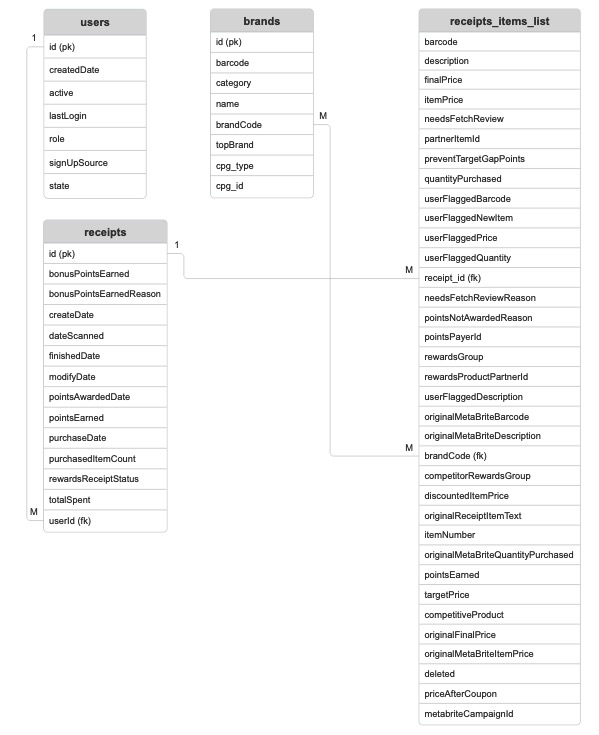

In [512]:
Image(filename = 'ER_Diagram.jpg')

In [452]:
# Download updated datasets
brands_updated.to_csv('brands_updated.csv', index = False)
users.to_csv('users_updated.csv', index = False)
receipts.to_csv('receipts_updated.csv', index = False)
receipts_items_list.to_csv('receipts_items_list.csv', index = False)